In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
titanic = pd.read_csv('Titanic_data.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning

In [4]:
titanic.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Pclass'], inplace=True)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Fare      891 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 34.9+ KB


In [6]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [7]:
titanic.dropna(inplace=True)

In [8]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Ordinal encoding Embarked col
titanic['Embarked'] = titanic['Embarked'].map({
    'S':0,
    'C':1,
    'Q':2
})

In [10]:
# Ordinal encoding Sex col
titanic['Sex'] = titanic['Sex'].map({
    'female':0,
    'male':1
})

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   Fare      889 non-null    float64
 4   Embarked  889 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 41.7 KB


# Analysing

In [12]:
titanic.head()

,Survived,Sex,Age,Fare,Embarked
0,0,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,1,0,26.0,7.9250,0
3,1,0,35.0,53.1000,0
4,0,1,35.0,8.0500,0


# Splitting Data

In [13]:
X = titanic.drop(columns=['Survived'])

In [14]:
y = titanic['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

# Building Naive Bayes Model

In [16]:
model_nb = GaussianNB()

In [17]:
model_nb.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred_nb = model_nb.predict(X_test)

In [19]:
model_nb.score(X_test, y_test)*100

83.85650224215246

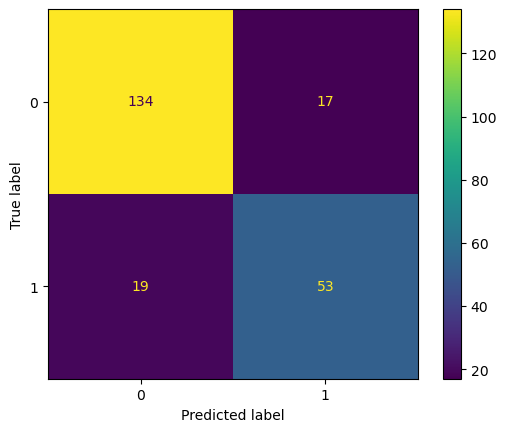

In [20]:
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(conf_mat_nb).plot()

In [21]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       151
           1       0.76      0.74      0.75        72

    accuracy                           0.84       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.84      0.84      0.84       223



# Building SVM Model

In [22]:
#model_SVM = SVC(kernel='linear', gamma='auto', C=2)

In [23]:
param_grid = {'C': [0.1, 1, 3, 10, 20],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  

In [24]:
model_SVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [25]:
model_SVM.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.754 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.805 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.754 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.805 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.754 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 10, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [30]:
print(model_SVM.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [26]:
y_pred_svm = model_SVM.predict(X_test)

In [27]:
model_SVM.score(X_test, y_test)*100

84.75336322869956

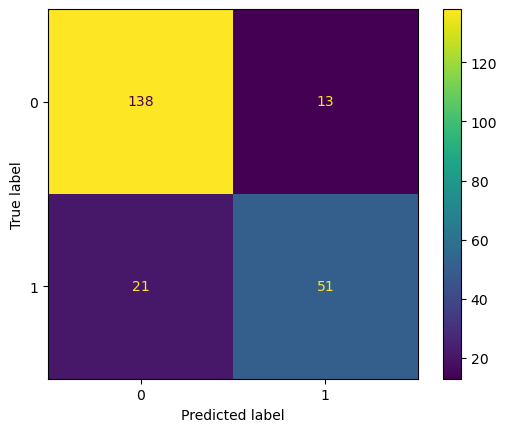

In [28]:
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(conf_mat_svm).plot()

In [29]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       151
           1       0.80      0.71      0.75        72

    accuracy                           0.85       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.84      0.85      0.85       223



# Building Random Forest Model

In [32]:
model_rf = RandomForestClassifier()

In [33]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred_rf = model_rf.predict(X_test)

In [35]:
model_rf.score(X_test, y_test)

0.8161434977578476

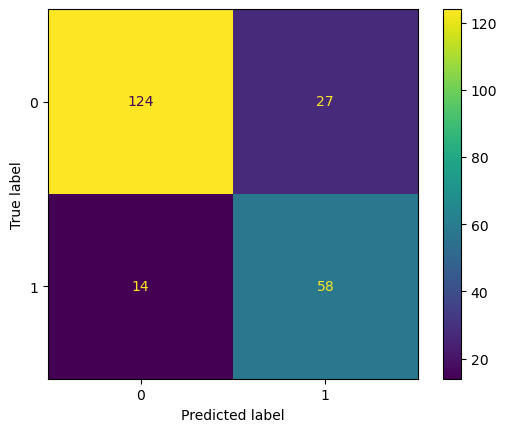

In [36]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(conf_mat_rf).plot()

In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       151
           1       0.68      0.81      0.74        72

    accuracy                           0.82       223
   macro avg       0.79      0.81      0.80       223
weighted avg       0.83      0.82      0.82       223

